In [1]:
from data.InformationForCity import InformationForCity
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
import requests
from IPython.display import display
import ipywidgets as widgets
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.style.use('ggplot')

import os

In [2]:
def request_data(endpoint, params):
    endpoint = endpoint
    r = requests.get(endpoint, params)
    return r.json()


In [3]:


plz_shape_df = gpd.read_file('F:\Praxisphase\Localisation\data-parser-staedte\image-generation\csv\plz-gebiete.shp',
                             dtype={'plz': str})

plz_region_df = pd.read_csv(
    'F:\Praxisphase\Localisation\data-parser-staedte\image-generation\csv\zuordnung_plz_ort.csv',
    sep=',',
    dtype={'plz': str}
)
plz_region_df.drop('osm_id', axis=1, inplace=True)
plz_einwohner_df = pd.read_csv(
    'F:\Praxisphase\Localisation\data-parser-staedte\image-generation\csv\plz_einwohner.csv',
    sep=',',
    dtype={'plz': str, 'einwohner': int}
)
germany_df = pd.merge(
    left=plz_shape_df,
    right=plz_region_df,
    on='plz',
    how='inner'
)
germany_df = pd.merge(
    left=germany_df,
    right=plz_einwohner_df,
    on='plz',
    how='left'
)


In [4]:
germany_df.head()
#germany_df['plz_points'] = germany_df.apply(lambda row: points_per_plz(row['plz'], row['ort']), axis=1)

plz                         note  \
0  52538      52538 Gangelt, Selfkant   
1  52538      52538 Gangelt, Selfkant   
2  47559             47559 Kranenburg   
3  52525  52525 Waldfeucht, Heinsberg   
4  52525  52525 Waldfeucht, Heinsberg   

                                            geometry         ort  \
0  POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...     Gangelt   
1  POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...    Selfkant   
2  POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...  Kranenburg   
3  POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...   Heinsberg   
4  POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...  Waldfeucht   

            bundesland  einwohner  
0  Nordrhein-Westfalen      21390  
1  Nordrhein-Westfalen      21390  
2  Nordrhein-Westfalen      10220  
3  Nordrhein-Westfalen      49737  
4  Nordrhein-Westfalen      49737

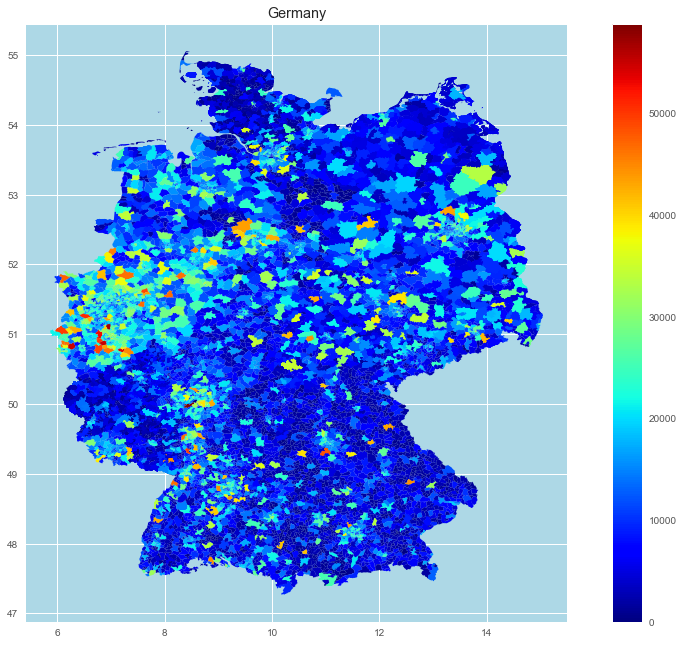

In [5]:
plt.rcParams['figure.figsize'] = [16, 11]
germany_df.head()

fig, ax = plt.subplots()

germany_df.plot(
    ax=ax,
    column='einwohner',
    categorical=False,
    legend=True,
    cmap='jet',
    alpha=1,

)
ax.set(
    title='Germany',
    aspect=1.3,
    facecolor='lightblue'
)
plt.savefig('einwohner.png')

